<a href="https://colab.research.google.com/github/coletta1/VAIL/blob/main/CNN_houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('/content/gdrive/My Drive/data/hpd.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [11]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [13]:
#Split dataset into input features
X = dataset[:,0:10] #take all rows from data and first ten columns

#Labels to predict
Y = dataset[:,10]

In [15]:
#Scale dataset so all the input features lie between 0, 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [18]:
#Split into train/test sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [19]:
#Split test into validationa and test sets
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [21]:
#Build model of 3 layers
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [23]:
model.compile(optimizer='sgd',            
              loss='binary_crossentropy', #BCE is loss function for outputs that take the values 1 or 0 
              metrics=['accuracy'])      

In [24]:
#Train the model on the training data
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.7034 - accuracy: 0.4393 - val_loss: 0.7066 - val_accuracy: 0.4292
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4830 - val_loss: 0.7000 - val_accuracy: 0.4292
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4843 - val_loss: 0.6937 - val_accuracy: 0.4429
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5114 - val_loss: 0.6871 - val_accuracy: 0.4612
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5299 - val_loss: 0.6803 - val_accuracy: 0.5068
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5749 - val_loss: 0.6730 - val_accuracy: 0.6027
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6328 - val_loss: 0.6657 - val_accuracy: 0.6804
Epoch 8/100


In [25]:
#Test model 
model.evaluate(X_test, Y_test)[1] #function returns loss as first element and accuracy as the second element so show only accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8995


0.8995434045791626

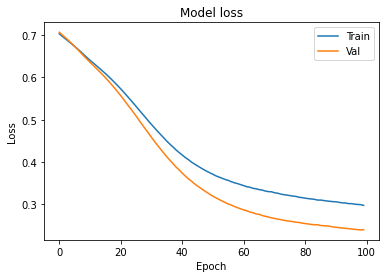

In [27]:
#Visualise training loss and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

KeyError: ignored

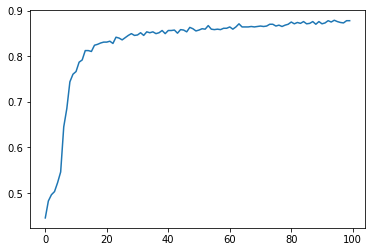

In [31]:
#Visualise training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()